## Introduction

1. Implement a single-neuron neural network, specifically the logistic regression unit.
2. Replace the sigmoid activation function with an alternative, such as ReLU and tan.
3. Utilize the Log Loss Function for the optimization process.
4. Code the stochastic gradient descent (SGD) algorithm for optimization.
5. Organize the implementation as a set of functions.
6. Perform a classification task using the Titanic dataset.
7. Evaluate the model's performance by calculating accuracy and F1 score as the final step

### Importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Loading the dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# list of columns in the dataset
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
# displaying first 10 rows
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Review data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Data Visualization

<AxesSubplot:title={'center':'Survival Rate by Gender'}, xlabel='Gender', ylabel='Survival Rate'>

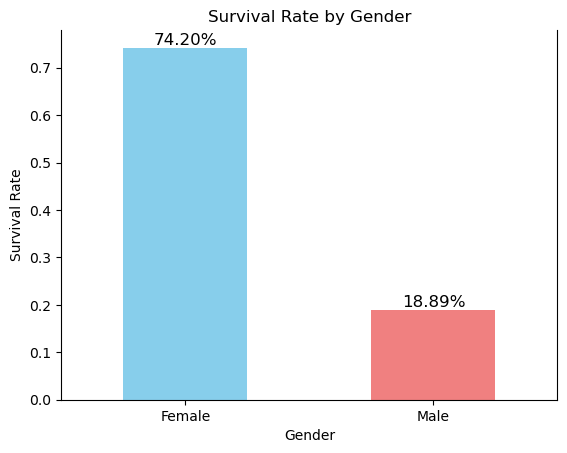

In [7]:
# Calculate the survival rate by gender
survival_rate = df.groupby("Sex")["Survived"].mean()
colors = ["skyblue", "lightcoral"]
labels = ["Female", "Male"]
fig, ax = plt.subplots()
survival_rate.plot(kind="bar", color=colors, ax=ax)
ax.set_xticklabels(labels, rotation=0)
ax.set_xlabel("Gender")
ax.set_ylabel("Survival Rate")
ax.set_title("Survival Rate by Gender")
for p in ax.patches:
    ax.annotate(f"{p.get_height()*100:.2f}%", (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')
ax.spines["top"].set_visible(False)
ax



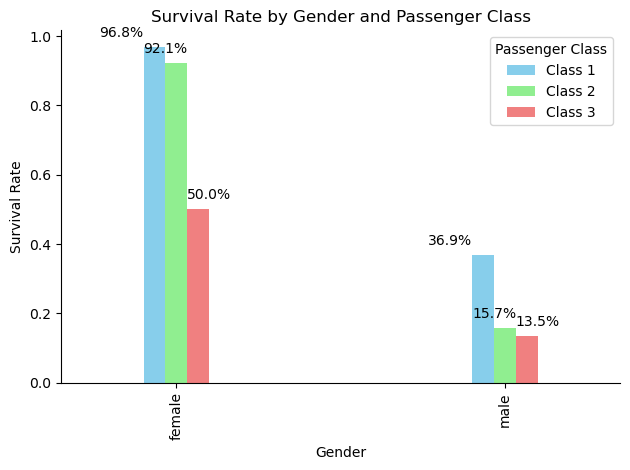

In [8]:
# Calculate the survival rate by gender and passenger class

survival_rate_by_class = df.groupby(["Sex", "Pclass"])["Survived"].mean().unstack()
class_colors = {1: "skyblue", 2: "lightgreen", 3: "lightcoral"}
ax = survival_rate_by_class.plot(kind="bar", width=0.2, color=[class_colors[col] for col in survival_rate_by_class.columns])
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Gender and Passenger Class")
plt.legend(title="Passenger Class", labels=[f"Class {col}" for col in survival_rate_by_class.columns], loc="upper right")
for i, container in enumerate(ax.containers):
    for j, p in enumerate(container.patches):
        ax.annotate(f"{p.get_height()*100:.1f}%", (p.get_x() + p.get_width() * (i - 1), p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.tight_layout()
plt.show()


In [9]:
# Filter out missing age values
filtered_age = df["Age"].dropna()


<AxesSubplot:title={'center':'Age Distribution of Passengers'}, xlabel='Age', ylabel='Number of Passengers'>

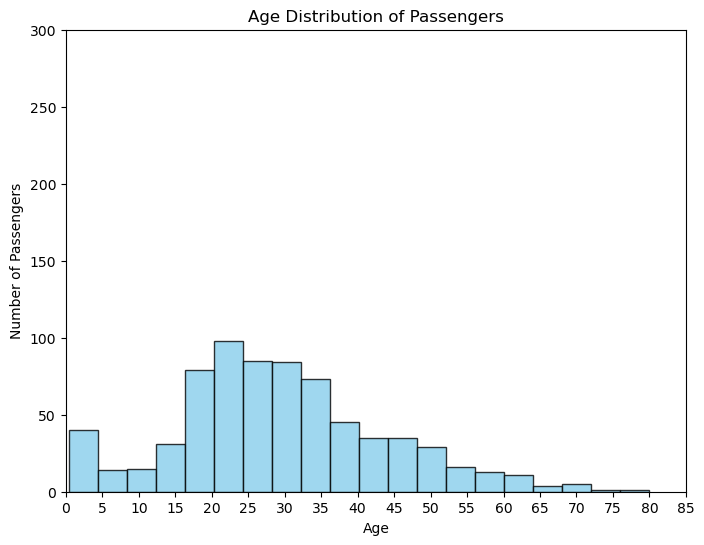

In [10]:
# Plot the age distribution of passengers using a histogram
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(filtered_age, bins=20, color="skyblue", edgecolor="black", alpha=0.8)
ax.set_xlabel("Age")
ax.set_ylabel("Number of Passengers")
ax.set_title("Age Distribution of Passengers")
plt.xticks(range(0, 90, 5))
plt.xlim(0, 85)
plt.ylim(0, 300)
plt.yticks(range(0, 301, 50))
mean_age = filtered_age.mean()
ax


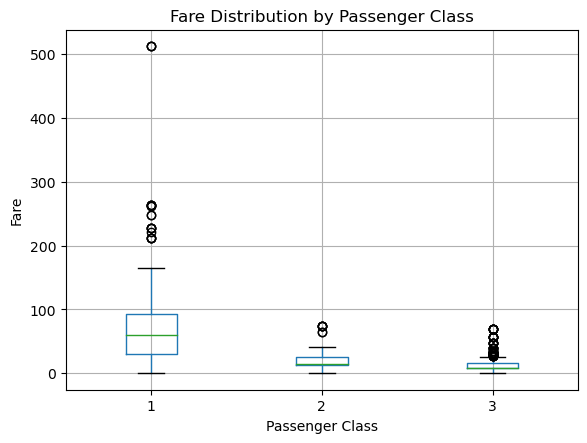

In [11]:
# Plot the fare distribution by passenger class
df.boxplot(column="Fare", by="Pclass")
plt.xlabel("Passenger Class")
plt.ylabel("Fare")
plt.title("Fare Distribution by Passenger Class")
plt.suptitle("")
plt.show()


### Defining the ReLU activation function 

In [12]:
def relu_function(X):
    return np.maximum(0, X)### The function for stochastic gradient descent (SGD) optimization

### The Log Loss function definition

In [13]:
def log_loss_function(y_true, y_predict):
    return -((y_true * np.log(y_predict)) + ((1 - y_true) * np.log(1 - y_predict)))


### The function for stochastic gradient descent (SGD) optimization

In [14]:
def sgd_function(X, y_true, weights_generated, rate_of_learning):
    y_pred = relu_function(np.dot(X, weights_generated))
    error = y_pred - y_true
    gradient = np.dot(X.T, error) / len(X)
    weights_generated -= rate_of_learning * gradient
    return weights_generated


###  The training function for the logistic regression model with SGD.

In [15]:
def logistic_regression(X, y, activation_function=relu_function, rate_of_learning=0.1, epochs=100):
    X = np.hstack((np.ones((X.shape[0], 1)), X))

    weights_generated = np.zeros(X.shape[1])
    
    # Looping over the specified number of epochs
    for epoch in range(epochs):
        # Looping over each training example
        for i in range(X.shape[0]):
            # Performing SGD update
            weights_generated = sgd_function(X[i], y[i], weights_generated, rate_of_learning)
    
    # Returning the learned weights
    return weights_generated

### Checking how many null and NaN are there in the dataset

In [16]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Data Wrangling

1. Removing non-relevant columns from the dataset.
2. Transforming categorical variables into one-hot encoding to represent different categories.
3. Imputing missing values by filling them with the mean (average) values.
4. Separating the dataset into features and labels.
5. Scaling the features to bring them to a similar scale for better model performance.
6. Dividing the Titanic dataset into training and testing sets, with 70% for training and 30% for testing, respectively.

In [18]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

df = pd.get_dummies(df, columns=['Sex', 'Embarked'])

df = df.fillna(df.mean())

X = df.drop('Survived', axis=1).values
y = df['Survived'].values

X = (X - X.mean()) / X.std()

np.random.seed(42)
idx = np.arange(X.shape[0])
np.random.shuffle(idx)
split_idx = int(X.shape[0] * 0.7)
X_train, X_test = X[idx[:split_idx]], X[idx[split_idx:]]
y_train, y_test = y[idx[:split_idx]], y[idx[split_idx:]]


### Checking if the no. of columns of the train and test data is same or not

In [19]:
print(X_test.shape)

print(y_test.shape)

print(X_train.shape)

print(y_train.shape)

(268, 10)
(268,)
(623, 10)
(623,)


### Training this logistic regression model

In [20]:
weights_generated = logistic_regression(X_train, y_train, activation_function=relu_function, rate_of_learning=0.1, epochs=100)


### Making predictions on the test set using Numpy package and using ReLu activation function instead of sigmoid

In [21]:
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
y_pred = np.round(relu_function(np.dot(X_test, weights_generated)))

### Calculating accuracy and F1 score

In [22]:
TP = np.sum((y_test == 1) & (y_pred == 1))
print(TP)
TN = np.sum((y_test == 0) & (y_pred == 0))
print(TN)
FP = np.sum((y_test == 0) & (y_pred == 1))
print(FP)
FN = np.sum((y_test == 1) & (y_pred == 0))
print(FN)

accuracy = (TP + TN) / (TP + TN + FP + FN)
print(accuracy)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * precision * recall / (precision + recall)
print('Accuracy:', accuracy)
print('F1 Score:', f1)

57
152
18
41
0.7798507462686567
Accuracy: 0.7798507462686567
F1 Score: 0.6589595375722543


### This model is built with the accuracy of 78% and F1 score of 0.66

### Defining the tan activation function

In [23]:
def tan_function(X):
    return np.tan(X)

def sgd_function(X, y_true, weights_generated, rate_of_learning):
    y_pred = tan_function(np.dot(X, weights_generated))
    error = y_pred - y_true
    gradient = np.dot(X.T, error)
    weights_generated -= rate_of_learning * gradient
    return weights_generated

def logistic_regression(X, y, activation_function=relu_function, rate_of_learning=0.1, epochs=100):
    X = np.hstack((np.ones((X.shape[0], 1)), X))

    weights_generated = np.zeros(X.shape[1])

    # Looping over the specified number of epochs
    for epoch in range(epochs):
        # Looping over each training example
        for i in range(X.shape[0]):
            # Performing SGD update
            weights_generated = sgd_function(X[i], y[i], weights_generated, rate_of_learning)

    # Returning the learned weights
    return weights_generated



In [24]:
y = df['Survived'].values

X = (X - X.mean()) / X.std()

np.random.seed(42)
idx = np.arange(X.shape[0])
np.random.shuffle(idx)
split_idx = int(X.shape[0] * 0.7)
X_train, X_test = X[idx[:split_idx]], X[idx[split_idx:]]
y_train, y_test = y[idx[:split_idx]], y[idx[split_idx:]]


### Checking if the no. of columns of the train and test data is same or not

In [25]:
print(X_test.shape)

print(y_test.shape)

print(X_train.shape)

print(y_train.shape)

(268, 10)
(268,)
(623, 10)
(623,)


### Training this logistic regression model

In [26]:
weights_generated = logistic_regression(X_train, y_train, activation_function=tan_function, rate_of_learning=0.1, epochs=100)


### Making predictions on the test set using Numpy package and using tan activation function instead of sigmoid

In [27]:
X_test_with_bias = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
y_pred = np.round(tan_function(np.dot(X_test_with_bias, weights_generated)))

### Calculating accuracy and F1 score

In [28]:
TP = np.sum((y_test == 1) & (y_pred == 1))
print(TP)
TN = np.sum((y_test == 0) & (y_pred == 0))
print(TN)
FP = np.sum((y_test == 0) & (y_pred == 1))
print(FP)
FN = np.sum((y_test == 1) & (y_pred == 0))
print(FN)

accuracy = (TP + TN) / (TP + TN + FP + FN)
print(accuracy)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * precision * recall / (precision + recall)
print('Accuracy:', accuracy)
print('F1 Score:', f1)

15
50
23
32
0.5416666666666666
Accuracy: 0.5416666666666666
F1 Score: 0.3529411764705882


### This model is built with the accuracy of 54% and F1 score of 0.35

### Inference

1. The Titanic dataset is a binary classification problem used to predict passenger survival based on characteristics like age, gender, and ticket class.
2. A single neural network model can be employed to make predictions with the Titanic dataset.
3. The neural network's weights reveal the most crucial features for predicting survival, such as higher ticket class and being female.
4. Unlike linear models, neural networks can learn non-linear relationships between features and the target variable.
5. Overfitting can occur if the neural network is trained for too long or with excessive complexity, leading to poor performance on new data.
6. Comparing the model's performance on training and validation sets helps detect overfitting.
7. A well-trained neural network can adapt well to slightly different data distributions, showcasing its generalization capabilities.
8. Although neural networks provide insights into feature-target relationships, they can be prone to overfitting and produce complex results that are not easily interpretable.